## EMNIST digit recognition with Convolutional Neural Network
* The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset. The EMNIST dataset consists of two parts:

1. EMNIST Balanced: This dataset contains a balanced distribution of all 26 letters and 10 digits, for a total of 784 classes.
2. EMNIST Unbalanced: This dataset contains a more realistic distribution of letters and digits, with some classes being more represented than others.

* Here, the digits dataset is used which has 10 classes(0-9). It has 2,40,000 train dataset and 40,000 test dataset.

* The EMNIST digit dataset is used to train a convolutional neural network (CNN) for image classification or digit recognition. A CNN is a type of deep learning model that is well-suited for image classification tasks. CNNs work by learning to extract features from images, and then using these features to classify the images into different categories.

* A convolution is the process of applying a filter (“kernel”) to an image. Max pooling is the process of reducing the size of the image through downsampling.

* In this notebook, convolutional layers is added to the neural network model using the Conv2D layer type in Keras. This layer is similar to the Dense layer, and has weights and biases that need to be tuned to the right values. The Conv2D layer also has kernels (filters) whose values need to be tuned as well. So, in a Conv2D layer the values inside the filter matrix are the variables that get tuned in order to produce the right output.


## emnist/digits dataset

In [1]:
!pip install -U tensorflow_datasets

In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

In [4]:
dataset, metadata = tfds.load('emnist/digits', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/240000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/digits/3.0.0.incompleteSM3U12/emnist-train.tfrecord*...:   0%|     …

Generating test examples...:   0%|          | 0/40000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/digits/3.0.0.incompleteSM3U12/emnist-test.tfrecord*...:   0%|      …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/digits/3.0.0. Subsequent calls will reuse this data.


In [5]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: ",num_train_examples)
print("Number of testing examples: ",num_test_examples)


Number of training examples:  240000
Number of testing examples:  40000


## Helper function for normalization of image

In [7]:
def normalize(images,labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images,labels

In [8]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

## First image of test dataset
* Take a single image and remove the color dimension by reshaping


In [9]:
for image,label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

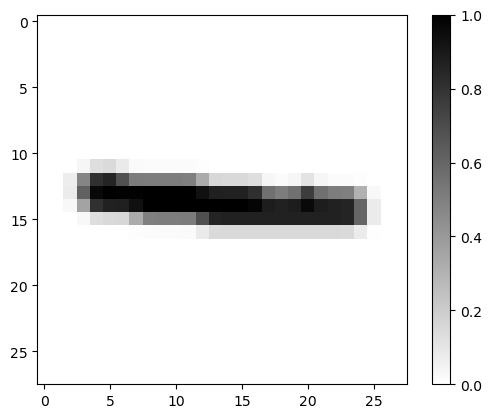

In [10]:
plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


## Let's plot first 30 images of test dataset

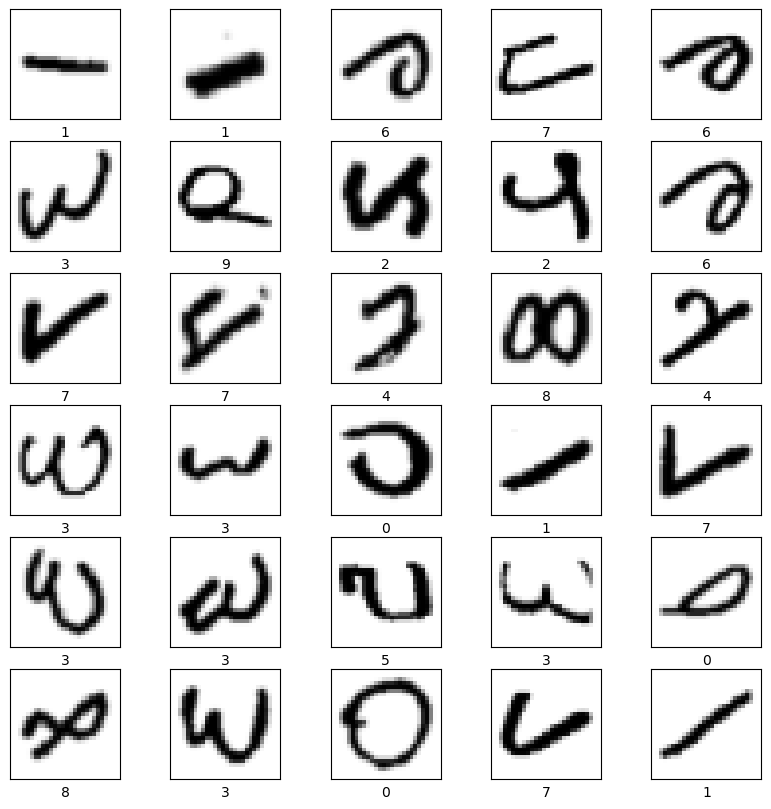

In [11]:
plt.figure(figsize = (10,10))
i =  0
for image,label in test_dataset.take(30):
  image = image.numpy().reshape(28,28)
  plt.subplot(6,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image, cmap = plt.cm.binary)
  plt.grid(False)
  plt.xlabel(class_names[label])
  i+=1

plt.show()

## Building the model with Convolutional neural network

In [12]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3), padding = 'same', activation = tf.nn.relu, input_shape = (28,28,1)),
                             tf.keras.layers.MaxPooling2D((2,2),strides = 2),
                             tf.keras.layers.Conv2D(64,(3,3),padding = 'same',activation = tf.nn.relu),
                             tf.keras.layers.MaxPooling2D((2,2),strides = 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

## Model compilation

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Batch division

In [14]:
BATCH_SIZE = 80
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

## Fitting the model

In [15]:
model.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
3000/3000 [==============================] - 141s 42ms/step - loss: 0.0652 - accuracy: 0.9810
Epoch 2/5
3000/3000 [==============================] - 123s 41ms/step - loss: 0.0234 - accuracy: 0.9931
Epoch 3/5
3000/3000 [==============================] - 119s 40ms/step - loss: 0.0162 - accuracy: 0.9955
Epoch 4/5
3000/3000 [==============================] - 119s 40ms/step - loss: 0.0124 - accuracy: 0.9966
Epoch 5/5
3000/3000 [==============================] - 120s 40ms/step - loss: 0.0095 - accuracy: 0.9972


* Training accuracy -  99.8%

## Test Accuracy

In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/BATCH_SIZE))
print(f"Test Loss = {test_loss}, Test Accuracy = {test_accuracy}")

500/500 [==============================] - 8s 16ms/step - loss: 0.0200 - accuracy: 0.9942
Test Loss = 0.02001902088522911, Test Accuracy = 0.9941750168800354


* Test accuracy - 99.5%

## Helper function for plotting images and probability distributions

In [17]:
def plot_images(i,predictions_array,true_labels,images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel(f"{class_names[predicted_label]} - {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color = color)



def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Helper function for predicting batchwise test images

In [18]:
!pip install simple_colors

In [19]:
from simple_colors import *

In [20]:
def Batch_test_images(i):
    if i <= 500:
        for test_images, test_labels in test_dataset.take(i):
            test_images = test_images.numpy()
            test_labels = test_labels.numpy()
            predictions = model.predict(test_images)
        
        print(f"\n\nThe prediction array: {predictions[0]}\n\n")
        print(f"Using argmax, the class label should be :{np.argmax(predictions[0])}\n\n")
        print(f"Test label in the test dataset: {test_labels[0]}\n\n")
        print(magenta(f"The class name {test_labels[0]} is {class_names[test_labels[0]]}\n\n",'bold'))
    
        print(green(f"Plotting the first image of the batch {i}\n",'underlined'))
        plt.figure(figsize = (6,3))
        plot_images(0,predictions, test_labels, test_images)
        plt.show()

        print(green("Plotting the probability distribution of the image\n",'underlined'))        
        img = test_images[0]
        img = np.array([img])
        plt.figure()
        predictions_single = model.predict(img)
        plot_value_array(0,predictions_single, test_labels)
        plt.xticks(range(10),class_names, rotation = 45)
        plt.show()
        print(magenta(f"Class label: {np.argmax(predictions_single[0])}\n\n",'bold'))  
    
        print(green("Images in this batch:",'underlined'))
        num_rows = 8
        num_cols = 4
    
        num_images = num_rows*num_cols
        plt.figure(figsize = (2*2*num_cols, 2*num_rows))
        for i in range(num_images):
            plt.subplot(num_rows, 2*num_cols, 2*i+1)
            plot_images(i,predictions, test_labels, test_images)
            plt.subplot(num_rows, 2*num_cols, 2*i+2)
            plot_value_array(i,predictions, test_labels)
            
        
    else:
        print(red("Batch number not available in the test dataset!",['bold','underlined']))

## Let's visualize first batch

3/3 [==============================] - 0s 9ms/step


The prediction array: [7.9539507e-11 9.9999720e-01 5.1004974e-08 9.5354515e-09 1.2958027e-06
 1.4313774e-07 5.5556471e-10 1.8023815e-07 7.5647499e-08 1.0525985e-06]


Using argmax, the class label should be :1


Test label in the test dataset: 1


The class name 1 is 1


Plotting the first image of the batch 1



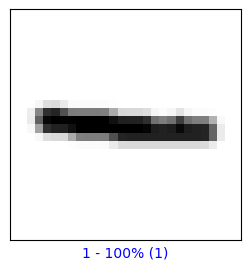

Plotting the probability distribution of the image

1/1 [==============================] - 0s 28ms/step


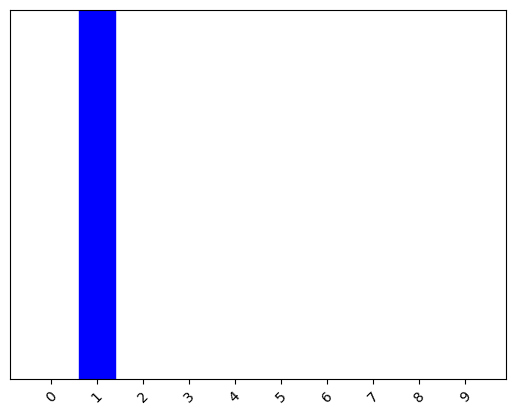

Class label: 1


Images in this batch:


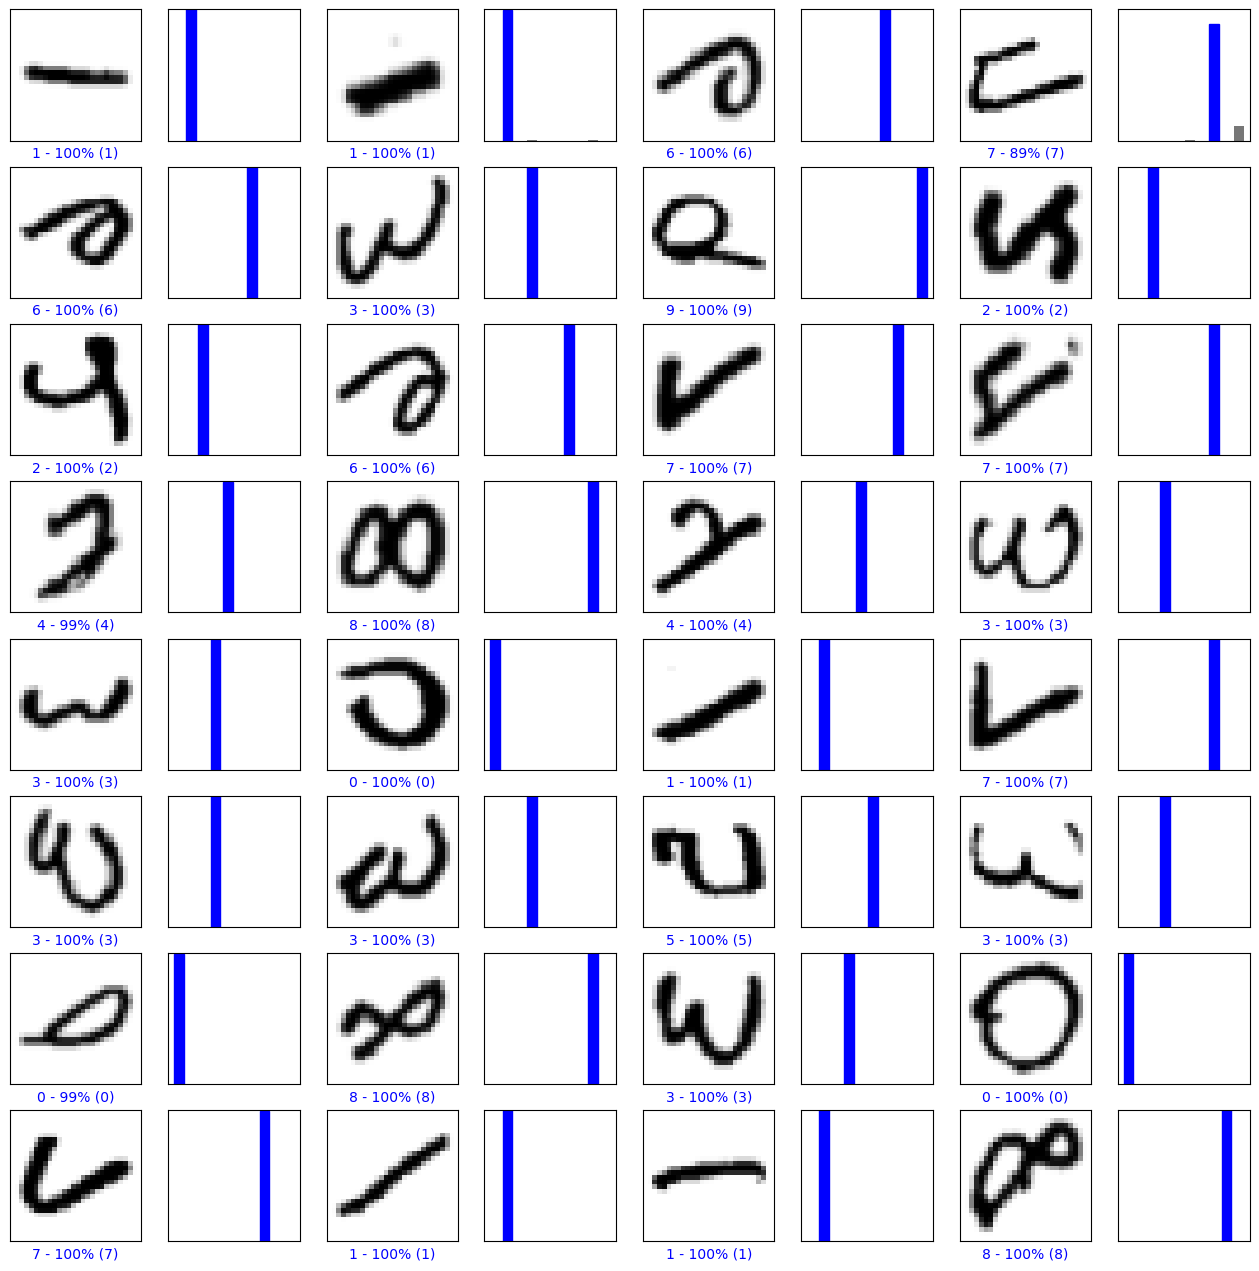

In [21]:
Batch_test_images(1)

## 88th batch

3/3 [==============================] - 0s 8ms/step


The prediction array: [5.7258002e-13 5.0329290e-16 1.2569047e-12 2.9861573e-07 8.4935553e-13
 9.9999768e-01 6.7730030e-11 5.6336202e-14 4.4723118e-11 1.9311981e-06]


Using argmax, the class label should be :5


Test label in the test dataset: 5


The class name 5 is 5


Plotting the first image of the batch 88



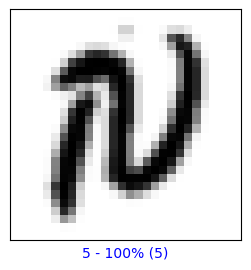

Plotting the probability distribution of the image

1/1 [==============================] - 0s 25ms/step


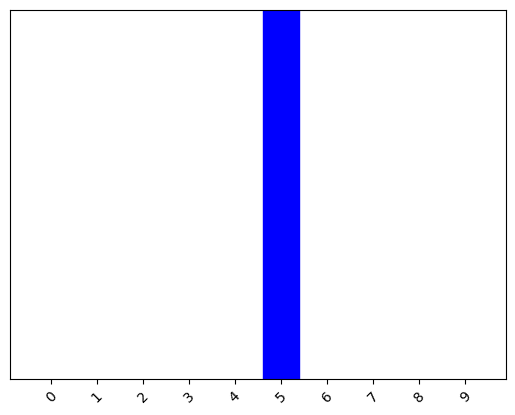

Class label: 5


Images in this batch:


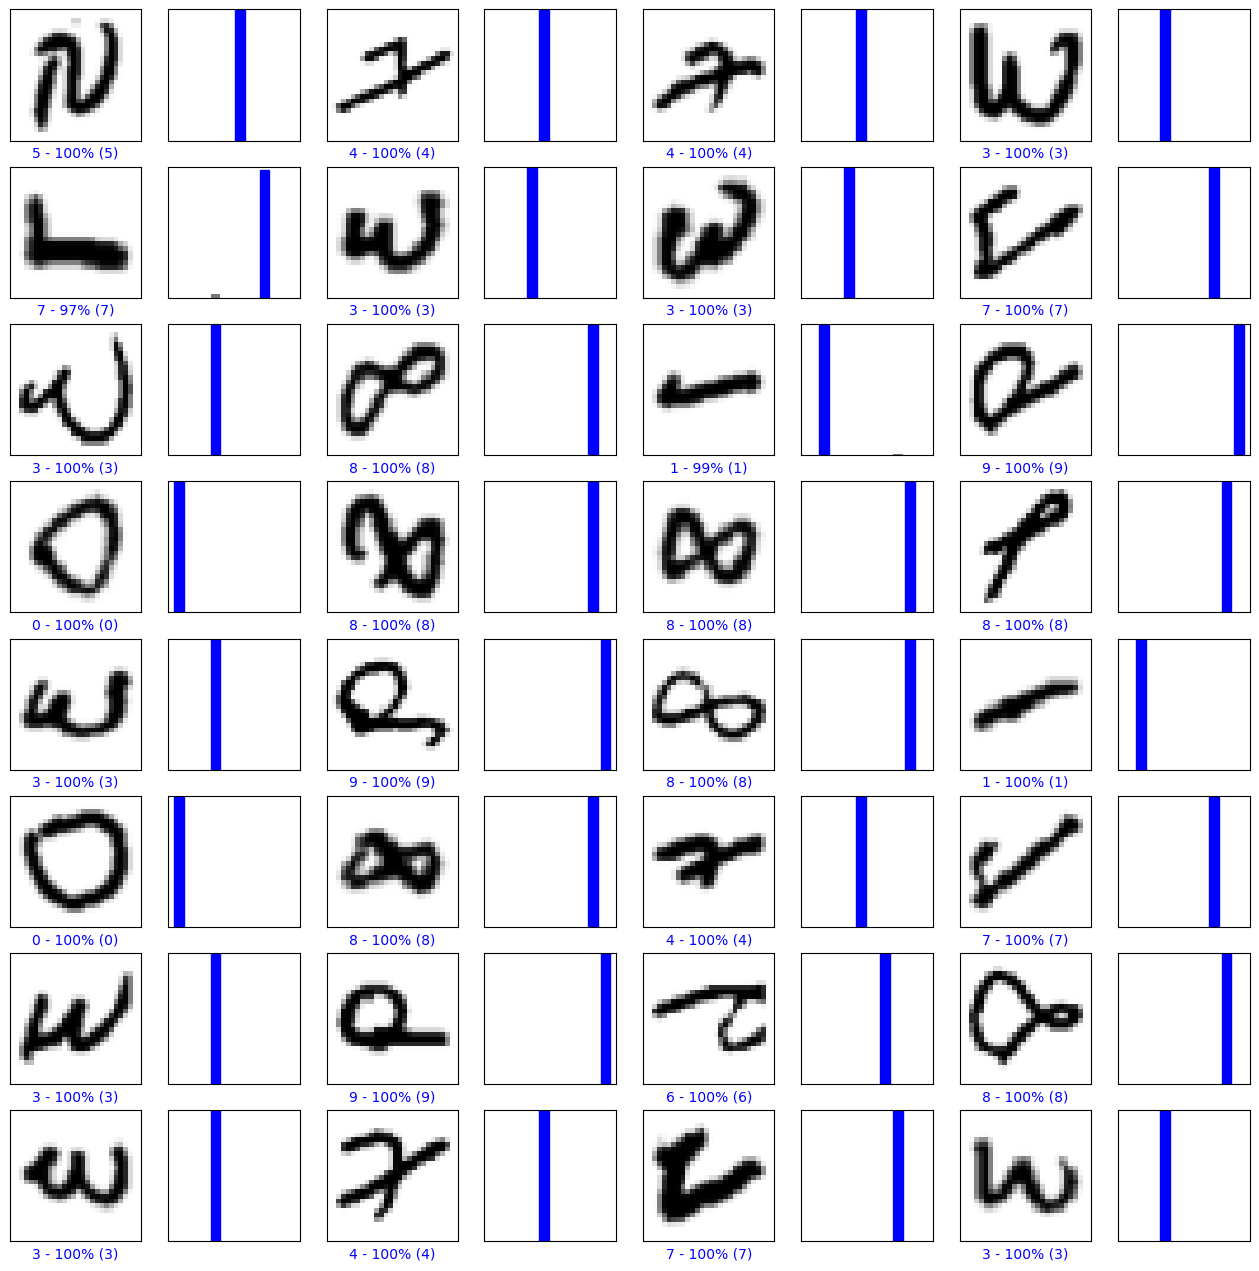

In [22]:
Batch_test_images(88)

## 500th batch

3/3 [==============================] - 0s 8ms/step


The prediction array: [2.9563182e-10 9.9999958e-01 1.2503980e-09 1.2344133e-11 3.9872100e-07
 1.1305895e-08 7.2725453e-10 2.1745223e-08 9.1221155e-09 2.2625562e-08]


Using argmax, the class label should be :1


Test label in the test dataset: 1


The class name 1 is 1


Plotting the first image of the batch 500



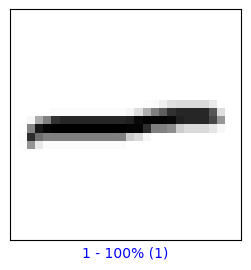

Plotting the probability distribution of the image

1/1 [==============================] - 0s 23ms/step


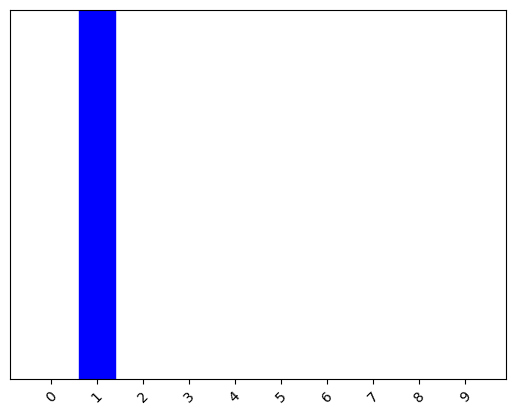

Class label: 1


Images in this batch:


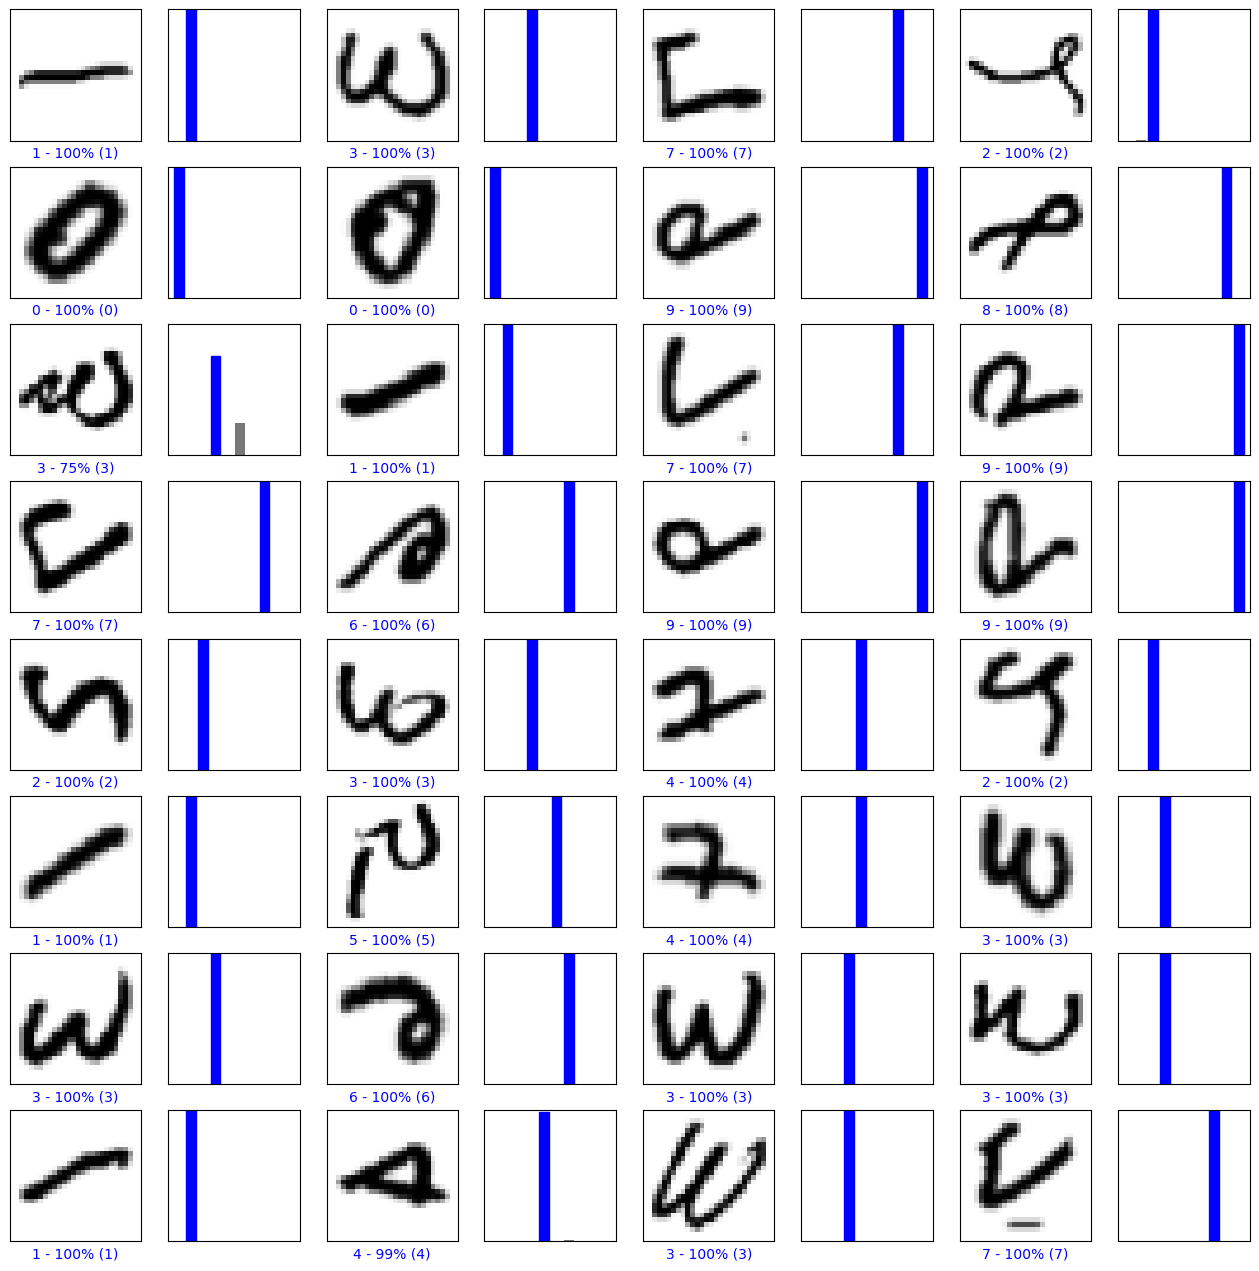

In [23]:
Batch_test_images(500)

## 501th batch

In [24]:
Batch_test_images(501)

Batch number not available in the test dataset!


## Conclusion:
* We were able to classify test dataset from the model trained on train dataset with train accuracy 99.8% and test accuracy 99.4%. Train accuarcy and test accuracy are matching, this is a very good model.
* There were 500 batches with batch size 80 in the test dataset, as total number of examples in the test dataset were 40,000.  